# Task-8 Timeline Analysis_Covid-19

## Author: Pratyush Raj


### Importing Needed Packages

In [1]:
pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline
sns.set()

### Downloading the Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
url="/content/drive/My Drive/datasets/owid-covid-data.csv"

In [5]:
df = pd.read_csv(url)

In [6]:
#Take a look at dataset

df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
5,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
6,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
7,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
8,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
9,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [7]:
#Take a look at dataset

df.tail(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
59119,NaN,NaN,International,2020-11-16,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59120,NaN,NaN,International,2020-11-17,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59121,NaN,NaN,International,2020-11-18,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59122,NaN,NaN,International,2020-11-19,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59123,NaN,NaN,International,2020-11-20,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59124,NaN,NaN,International,2020-11-21,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59125,NaN,NaN,International,2020-11-22,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59126,NaN,NaN,International,2020-11-23,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59127,NaN,NaN,International,2020-11-24,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59128,NaN,NaN,International,2020-11-25,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Exploration

In [8]:
#Summarize the data

df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.547800e+04,58181.000000,57367.000000,4.592400e+04,58181.000000,57367.000000,55183.000000,58117.000000,57302.000000,45644.000000,58117.000000,57302.000000,38758.000000,4624.000000,4624.000000,5196.000000,5196.000000,396.000000,396.000000,696.000000,696.000000,2.278200e+04,2.255400e+04,22782.000000,22554.000000,2.553400e+04,25534.000000,23621.000000,24031.000000,48123.000000,5.879800e+04,56002.000000,52553.000000,51760.000000,52279.000000,51870.000000,34559.000000,52526.000000,54464.000000,40806.000000,40284.000000,24936.000000,47273.000000,58039.000000,50718.000000
mean,1.793037e+05,2058.374005,2028.984343,7.106123e+03,48.470188,48.140103,3383.120987,41.987829,41.158368,99.229757,0.723399,0.708420,1.044327,753.278547,14.313215,4028.224018,84.456511,243.581985,7.645217,2256.511000,64.927756,2.441265e+06,2.929496e+04,84.587772,0.953439,2.818469e+04,0.935381,181.291533,0.069055,56.891259,8.519895e+07,361.097740,31.174475,9.170881,5.794139,20586.995122,12.478729,252.871767,8.075618,10.733688,32.640904,52.034202,3.087483,73.928026,0.721913
std,1.816135e+06,19414.443859,18980.255474,5.792789e+04,404.335164,390.384000,6676.223731,138.597508,107.366347,185.546151,3.129700,2.049739,0.391588,2077.791414,20.295848,10254.226174,122.677857,546.217929,19.384813,5573.563583,199.318394,1.114811e+07,1.184494e+05,169.320069,1.760301,1.090542e+05,1.627880,867.952029,0.089453,25.772058,6.001474e+08,1638.795598,9.047735,6.295075,4.293723,20297.319763,19.454001,117.585430,4.200455,10.469128,13.456090,31.649172,2.511120,7.400341,0.153334
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,-67.901000,-9.678000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,-3.743000e+03,0.000000,-0.398000,0.000000e+00,0.000000,1.535000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.880000e+02,0.000000,0.857000,1.300000e+01,0.000000,0.000000,95.035000,0.000000,0.284000,4.165000,0.000000,0.000000,0.870000,9.000000,1.805000,39.750000,10.807000,3.810500,0.807500,15.182750,4.278750,6.440000e+04,1.066000e+03,4.336500,0.075000,1.140000e+03,0.077000,10.424000,0.010000,39.810000,1.326539e+06,37.728000,23.200000,3.548000,2.085000,5321.444000,0.500000,156.139000,5.310000,1.900000,21.400000,20.859000,1.300000,69.870000,0.601000
50%,2.207000e+03,14.000000,20.143000,8.800000e+01,0.000000,0.286000,637.642000,2.286000,4.017500,21.598000,0.000000,0.030000,1.040000,50.000000,6.232500,221.000000,37.365000,21.017500,2.093000,126.157000,16.058000,2.845865e+05,3.847500e+03,22.507500,0.351000,4.156500e+03,0.359000,28.500000,0.034000,60.190000,7.976985e+06,88.125000,31.100000,6.933000,4.321000,13913.839000,2.000000,240.208000,7.140000,6.300000,31.400000,52.232000,2.500000,75.290000,0.752000
75%,2.461550e+04,249.000000,262.214500,7.680000e+02,4.000000,4.286000,3684.635500,27.532000,31.296750,98.593250,0.307000,0.450750,1.220000,345.000000,18.655250,1737.250000,100.714750,192.831000,6.756

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59129 entries, 0 to 59128
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            58798 non-null  object 
 1   continent                           58467 non-null  object 
 2   location                            59129 non-null  object 
 3   date                                59129 non-null  object 
 4   total_cases                         55478 non-null  float64
 5   new_cases                           58181 non-null  float64
 6   new_cases_smoothed                  57367 non-null  float64
 7   total_deaths                        45924 non-null  float64
 8   new_deaths                          58181 non-null  float64
 9   new_deaths_smoothed                 57367 non-null  float64
 10  total_cases_per_million             55183 non-null  float64
 11  new_cases_per_million               58117

### droping the Duplicates rows

In [10]:
df.shape

(59129, 50)

In [11]:
duplicate_rows_df = df[df.duplicated()]

print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 50)


In [12]:
df.count() #Used to count the number of rows

iso_code                              58798
continent                             58467
location                              59129
date                                  59129
total_cases                           55478
new_cases                             58181
new_cases_smoothed                    57367
total_deaths                          45924
new_deaths                            58181
new_deaths_smoothed                   57367
total_cases_per_million               55183
new_cases_per_million                 58117
new_cases_smoothed_per_million        57302
total_deaths_per_million              45644
new_deaths_per_million                58117
new_deaths_smoothed_per_million       57302
reproduction_rate                     38758
icu_patients                           4624
icu_patients_per_million               4624
hosp_patients                          5196
hosp_patients_per_million              5196
weekly_icu_admissions                   396
weekly_icu_admissions_per_millio

In [13]:
#df = df.drop_duplicates()

#df.head()

In [14]:
#df.count()

### Checking the Missing or Null values

In [15]:
print(df.isnull().sum())

iso_code                                331
continent                               662
location                                  0
date                                      0
total_cases                            3651
new_cases                               948
new_cases_smoothed                     1762
total_deaths                          13205
new_deaths                              948
new_deaths_smoothed                    1762
total_cases_per_million                3946
new_cases_per_million                  1012
new_cases_smoothed_per_million         1827
total_deaths_per_million              13485
new_deaths_per_million                 1012
new_deaths_smoothed_per_million        1827
reproduction_rate                     20371
icu_patients                          54505
icu_patients_per_million              54505
hosp_patients                         53933
hosp_patients_per_million             53933
weekly_icu_admissions                 58733
weekly_icu_admissions_per_millio

In [16]:
#If you finds missing values in your data then remove it's by using following steps

#df = df.dropna() #Droping the missing values

#df.count()

In [17]:
#print(df.isnull().sum()) #After dropping the values

In [18]:
df1 = df[["date", "total_cases", "new_cases", "total_deaths", "new_tests", "total_tests"]]

df1.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
0,2019-12-31,NaN,0.0,NaN,NaN,NaN
1,2020-01-01,NaN,0.0,NaN,NaN,NaN
2,2020-01-02,NaN,0.0,NaN,NaN,NaN
3,2020-01-03,NaN,0.0,NaN,NaN,NaN
4,2020-01-04,NaN,0.0,NaN,NaN,NaN


In [19]:
df1.date = pd.to_datetime(df.date)

df1.set_index('date', inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [20]:
df1.head()

,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2019-12-31,NaN,0.0,NaN,NaN,NaN
2020-01-01,NaN,0.0,NaN,NaN,NaN
2020-01-02,NaN,0.0,NaN,NaN,NaN
2020-01-03,NaN,0.0,NaN,NaN,NaN
2020-01-04,NaN,0.0,NaN,NaN,NaN


In [21]:
df1.tail()

,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2020-11-21,696.0,NaN,7.0,NaN,NaN
2020-11-22,696.0,NaN,7.0,NaN,NaN
2020-11-23,696.0,NaN,7.0,NaN,NaN
2020-11-24,696.0,NaN,7.0,NaN,NaN
2020-11-25,696.0,NaN,7.0,NaN,NaN


Text(0.5, 0, 'Month')

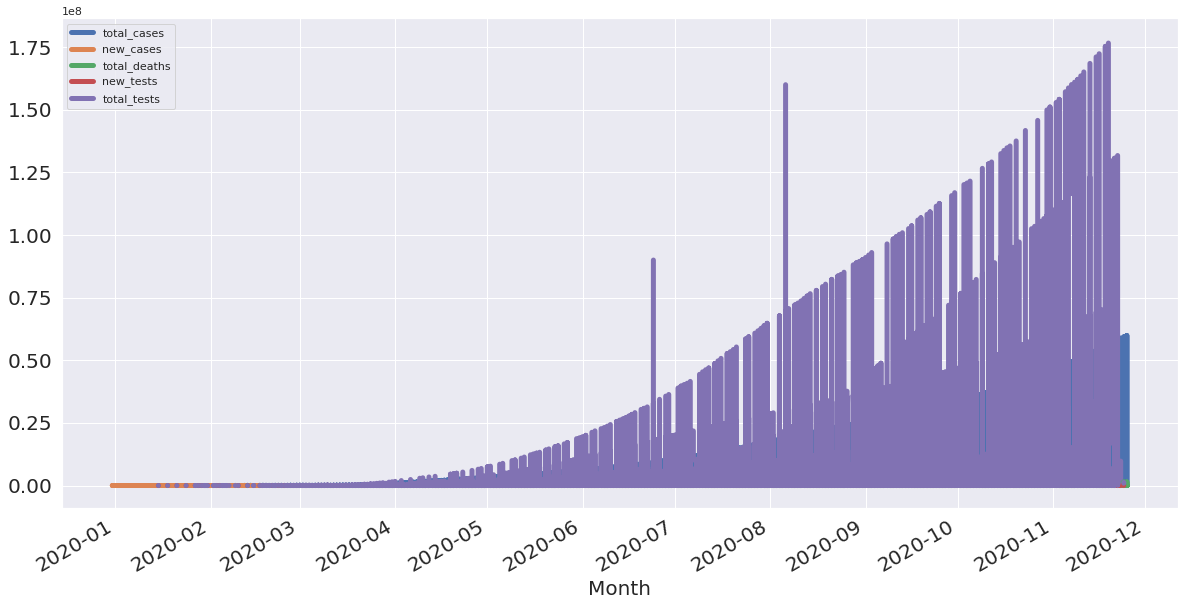

In [22]:
df1.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

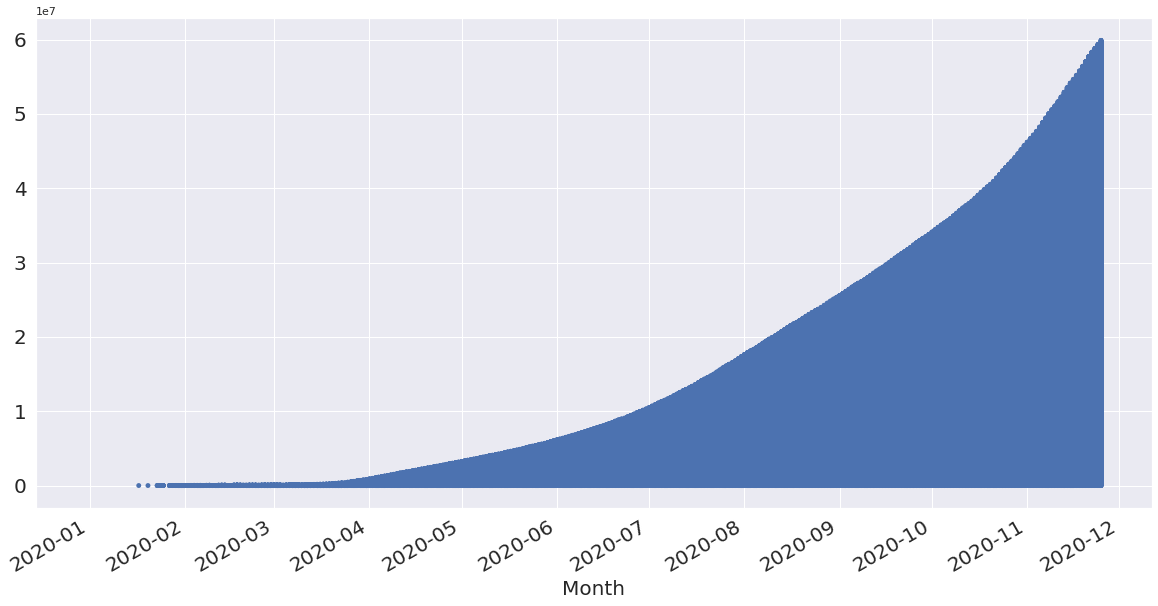

In [23]:
df1.total_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

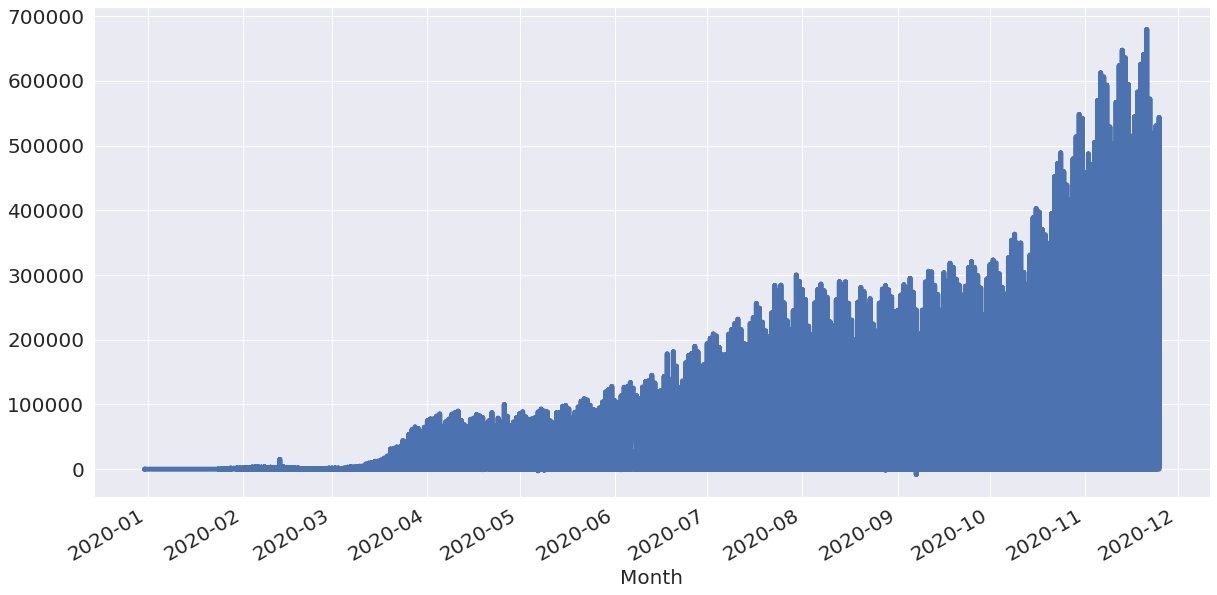

In [24]:
df1.new_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

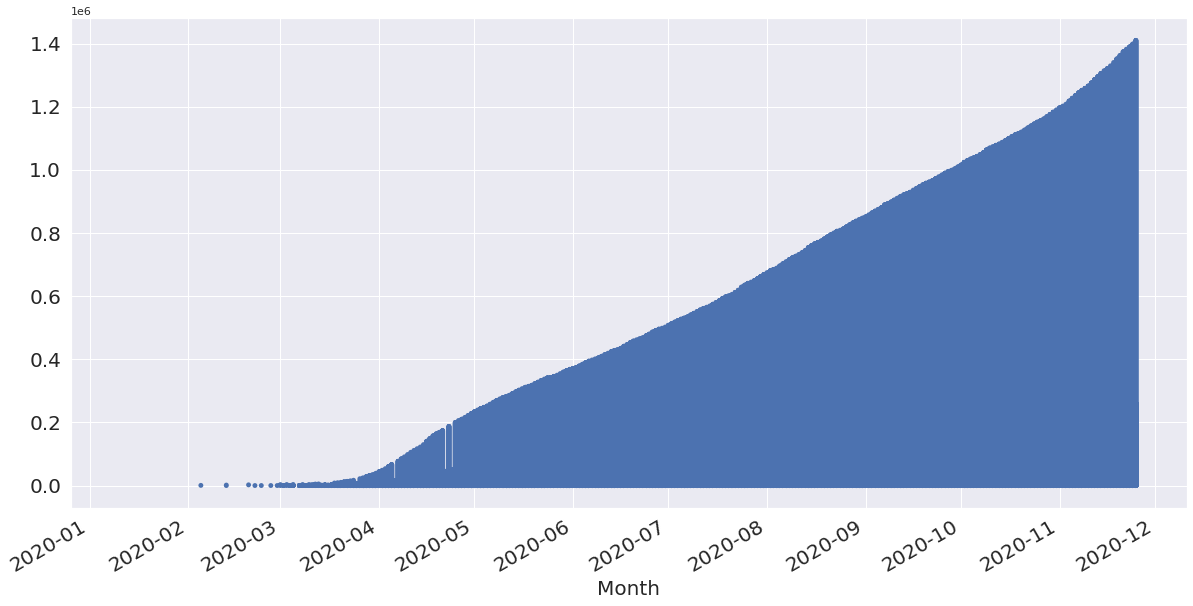

In [25]:
df1.total_deaths.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

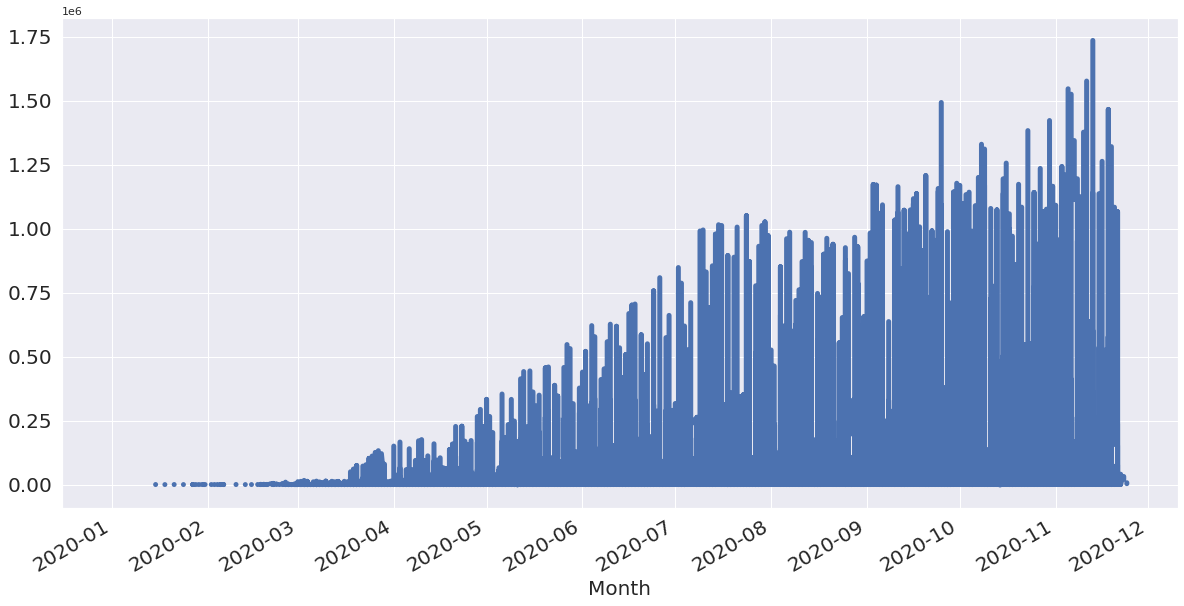

In [26]:
df1.new_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

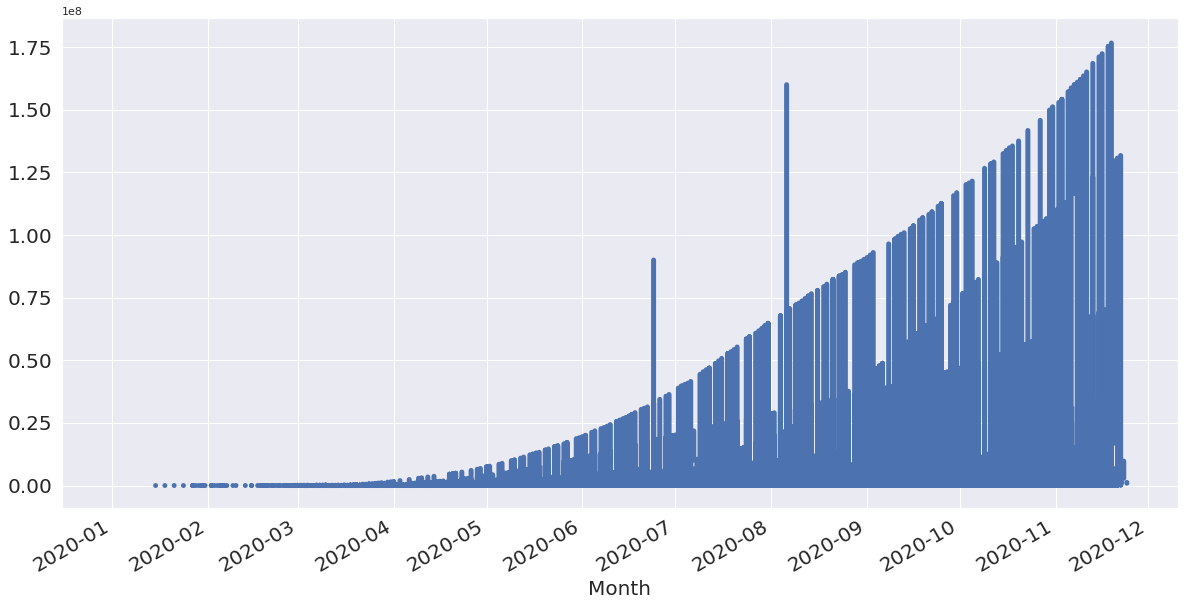

In [27]:
df1.total_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

### Trends and Seasonality in TimeSeries Data

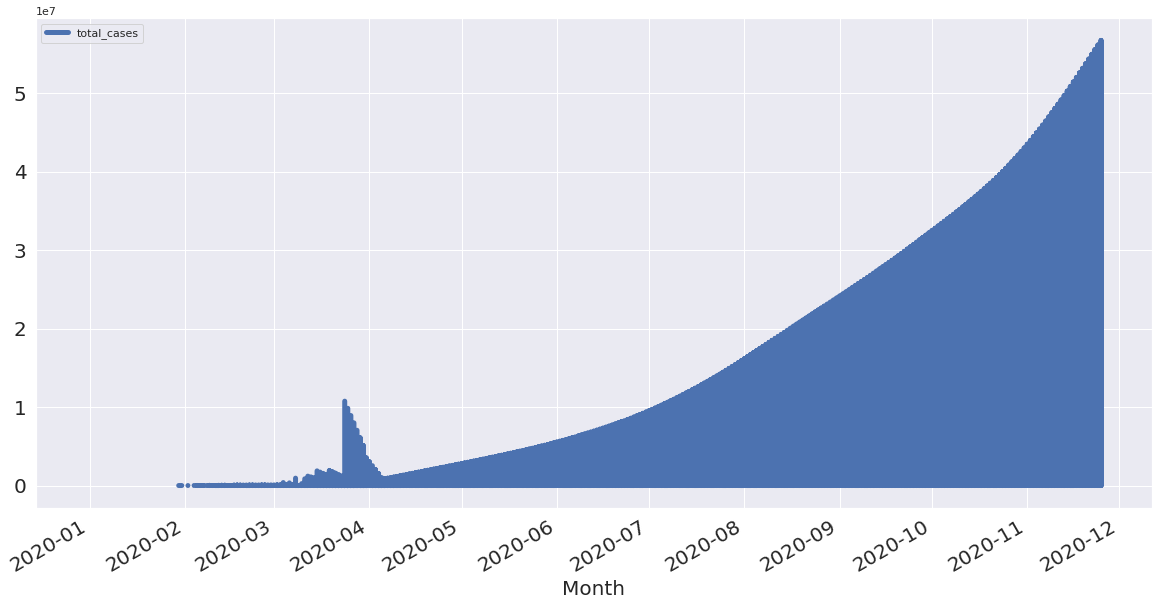

In [28]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

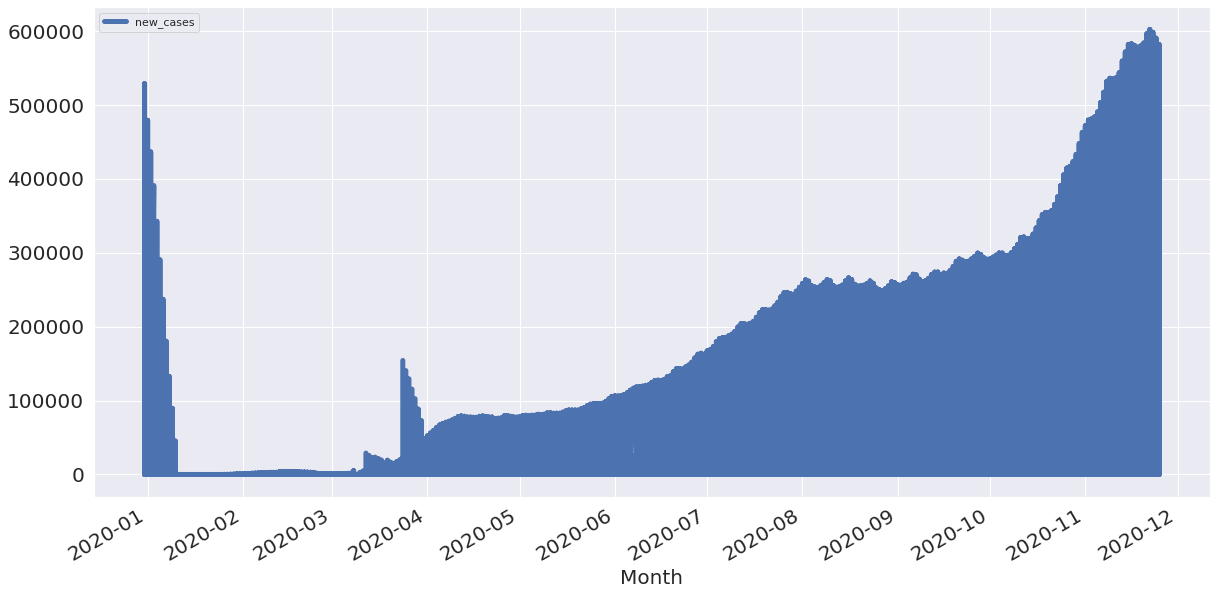

In [29]:
new_cases = df1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

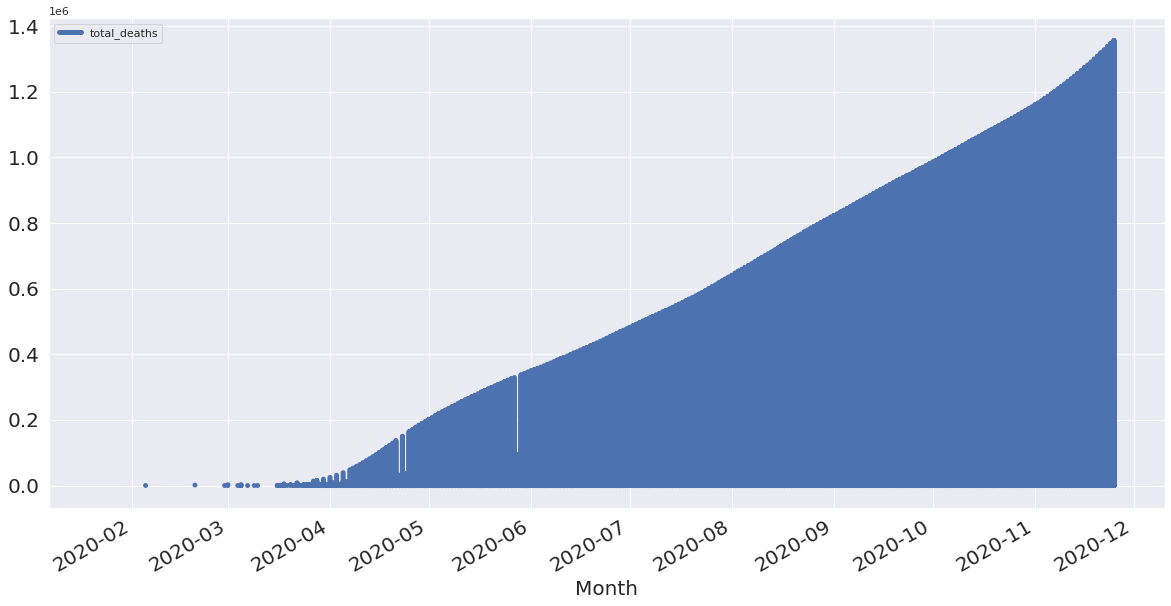

In [30]:
total_deaths = df1[['total_deaths']]
total_deaths.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

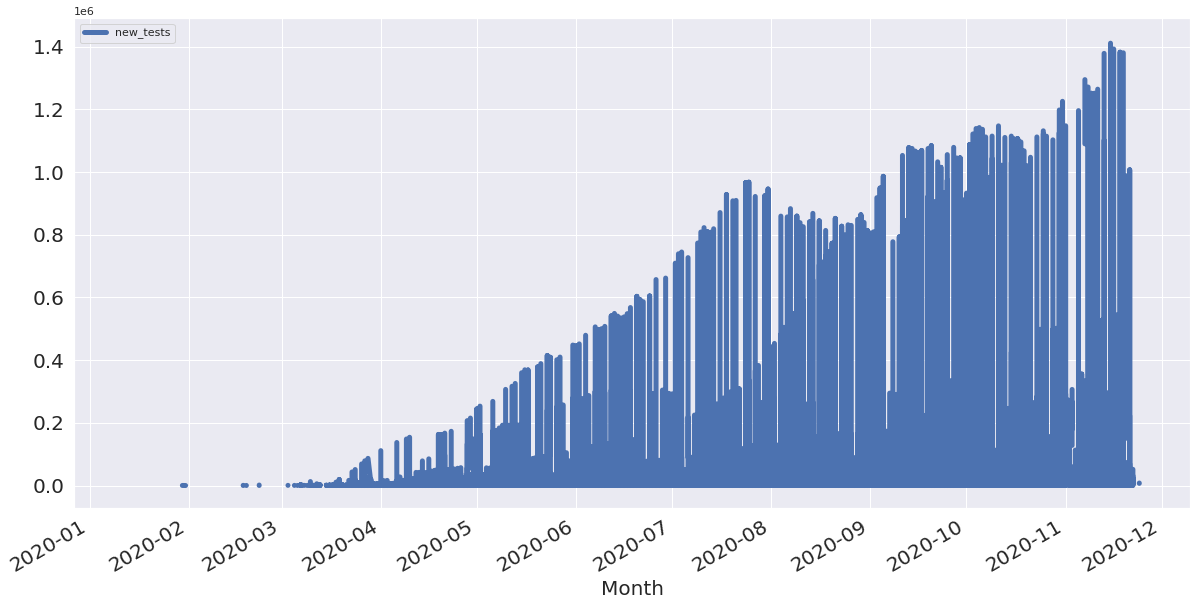

In [31]:
new_tests = df1[['new_tests']]
new_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

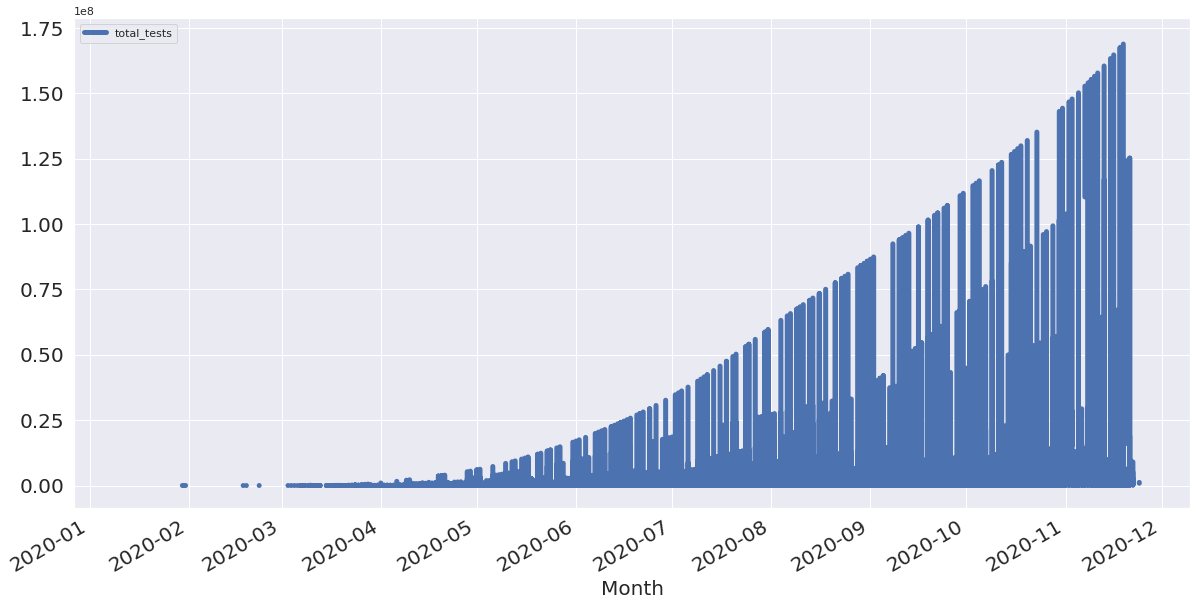

In [32]:
total_tests = df1[['total_tests']]
total_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

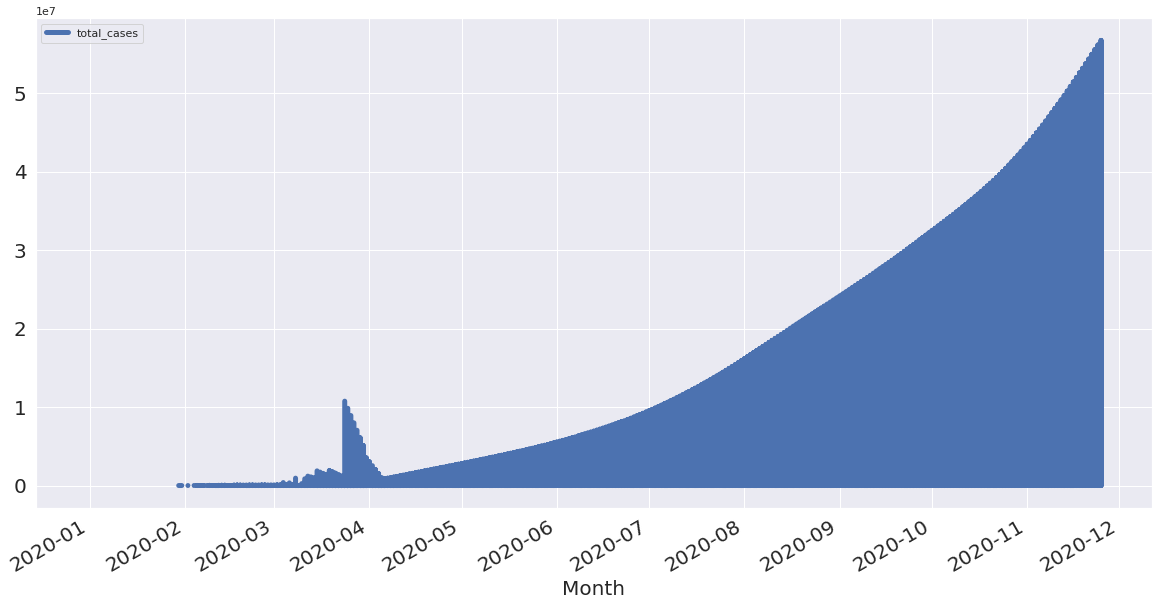

In [33]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

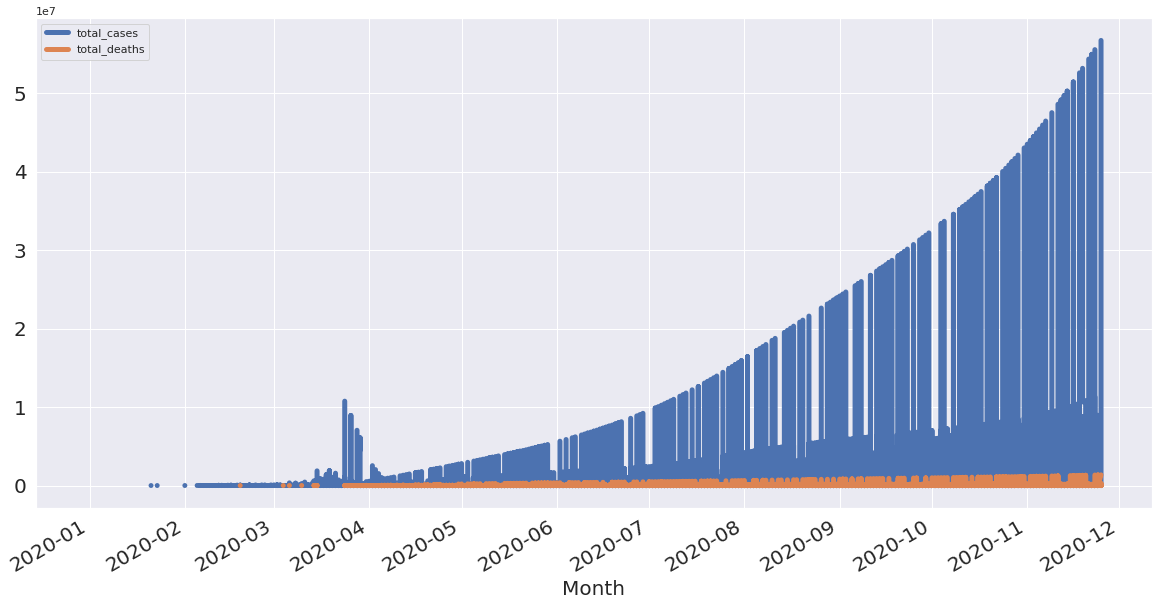

In [37]:
df_rm = pd.concat([total_cases.rolling(12).mean(), total_deaths.rolling(12).mean()])
df_rm.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

### Seasonal Patterns in Time Series Data

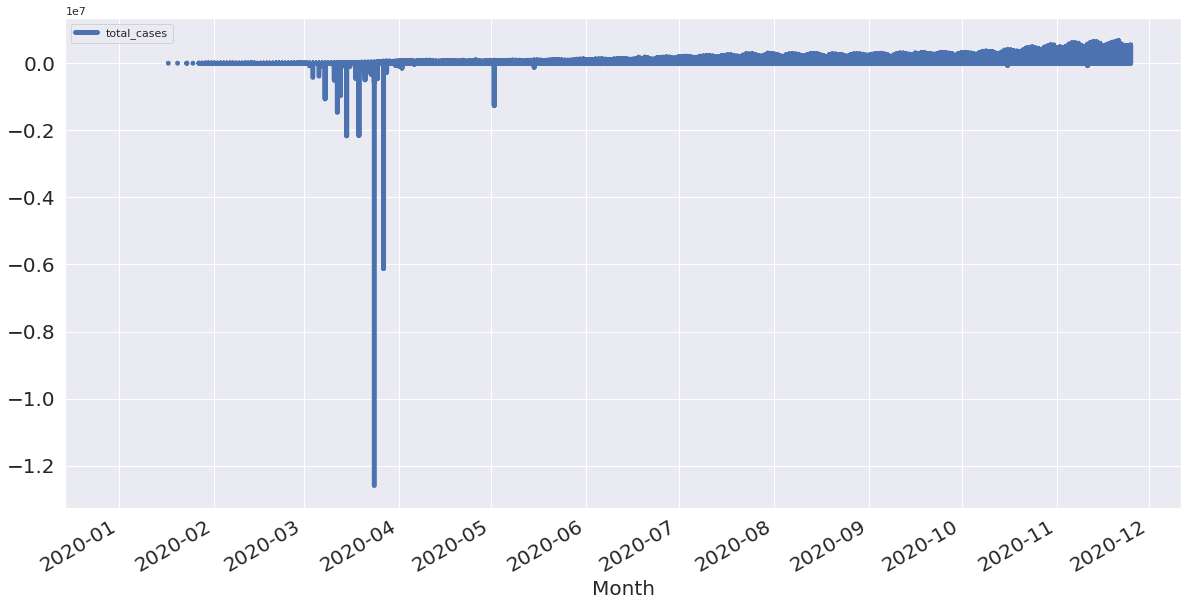

In [38]:
total_cases.diff().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20);